## Curso
APRENDIZAJE AUTOMÁTICO: Teoría y aplicaciones - INF648
## Integrantes
- DURAN TINOCO, RICHARD HERNAN, Codigo:	20032283
- ALVAREZ ROJAS, DOMINICK PATRICIA, Codigo:	20150169
- POVIS RODRIGUEZ, ANGEL LUIS, Codigo:		20255349

## Proyecto:
Productivity Prediction of Garment Employees Data Set


In [407]:
pip install ucimlrepo

# **1. LECTURA DEL DATASET**

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# obtención del dataset
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597)

# dividimos entre la data X y el target y
X = productivity_prediction_of_garment_employees.data.features
y = productivity_prediction_of_garment_employees.data.targets
X['actual_productivity'] = y

# visualizamos la metadata
print(productivity_prediction_of_garment_employees.metadata)

# visualizamos las variables
print(productivity_prediction_of_garment_employees.variables)


{'uci_id': 597, 'name': 'Productivity Prediction of Garment Employees', 'repository_url': 'https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees', 'data_url': 'https://archive.ics.uci.edu/static/public/597/data.csv', 'abstract': 'This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 1197, 'num_features': 14, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['actual_productivity'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51S6D', 'creators': [], 'intro_paper': {'ID': 399, 'type': 'NATIVE', 'title': 'Mining the productivity dat

# **2. TRATAMIENTO INICIAL DE LOS DATOS**

##**2.1 Eliminación de outliers para la columna incentivo**

In [409]:
def count_incentive_outliers(X: pd.DataFrame, threshold: float) -> None:
    count = (X['incentive'] >= threshold).sum()
    print(f"Cantidad de outliers en 'incentive' >= {threshold}: {count}")

import pandas as pd

def remove_incentive_outliers(X: pd.DataFrame, threshold: float) -> pd.DataFrame:
    X_filtered = X[X['incentive'] < threshold].copy()
    return X_filtered

count_incentive_outliers(X, 300)
X = remove_incentive_outliers(X, 300)

Cantidad de outliers en 'incentive' >= 300: 10


##**2.2 Eliminación de outliers para la columna 'over_time'**

In [410]:
def remove_over_time_outliers(X: pd.DataFrame, threshold: float) -> pd.DataFrame:
    X_filtered = X[X['over_time'] < threshold].copy()
    return X_filtered

def count_over_time_outliers(X: pd.DataFrame, threshold: float) -> None:
    count = (X['over_time'] >= threshold).sum()
    print(f"Cantidad de outliers en 'over_time' >= {threshold}: {count}")

threshold_value = 15000

count_over_time_outliers(X, threshold_value)
X_clean = remove_over_time_outliers(X, threshold_value)

Cantidad de outliers en 'over_time' >= 15000: 4


##**2.3 Eliminación de outliers para la columna 'idle_time'**

In [411]:
def remove_idle_time_outliers(X: pd.DataFrame, threshold: float) -> pd.DataFrame:
    X_filtered = X[X['idle_time'] < threshold].copy()
    return X_filtered

def count_idle_time_outliers(X: pd.DataFrame, threshold: float) -> None:
    count = (X['idle_time'] >= threshold).sum()
    print(f"Cantidad de outliers en 'idle_time' >= {threshold}: {count}")


threshold_value = 20

count_idle_time_outliers(X, threshold_value)
X_clean = remove_idle_time_outliers(X, threshold_value)

Cantidad de outliers en 'idle_time' >= 20: 4


##**2.4 Validación de datos con la columna 'wip' en nulo**

In [412]:
X[X['wip'].isnull()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


# **3. ANÁLISIS DEL TARGET (PRODUCTIVIDAD)**

## 3.1 Productivy over time

<Axes: title={'center': ' Productivity Over Time'}, xlabel='Date', ylabel='Productivity'>

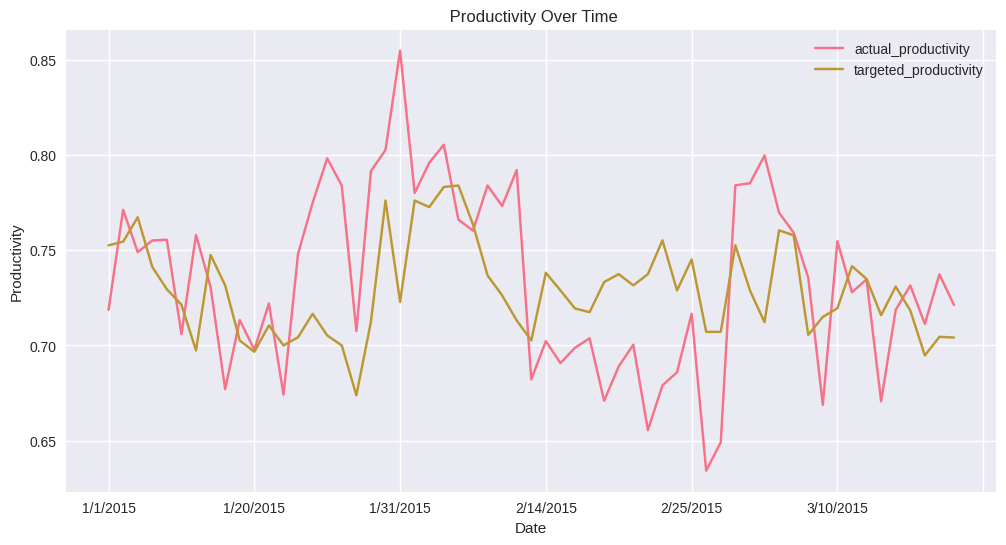

In [413]:
X.groupby(['date']).agg({'actual_productivity': 'mean','targeted_productivity': 'mean'}).plot(
    title=' Productivity Over Time',
    xlabel='Date',
    ylabel='Productivity',
    figsize=(12, 6))

##3.2 Distribución de productividad (target del dataset)

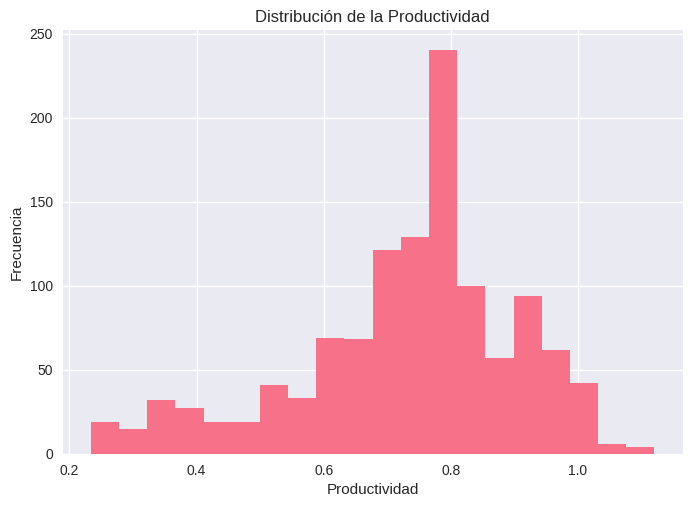

In [414]:
# Distribución de 'actual_productivity' (para definir clases)
plt.hist(y['actual_productivity'], bins=20)
plt.xlabel('Productividad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Productividad')
plt.show()

# **4. ANÁLISIS DISTRIBUCIÓN COLUMNAS DEL DATASET (X)**

In [415]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Se emplea seaborn para mejor visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def plot_all_columns(df):
    # Obtenemos la cantidad de columnas
    n_cols = len(df.columns)

    # Se calcula el número de filas necesarias para la caCalculate number of rows needed for subplot grid
    n_rows = (n_cols + 2) // 3

    fig = plt.figure(figsize=(15, 5*n_rows))

    for idx, col in enumerate(df.columns, 1):
        plt.subplot(n_rows, 3, idx)

        # Visualizamos para columnas numericas
        if pd.api.types.is_numeric_dtype(df[col]):
            # Histograma
            sns.histplot(data=df, x=col, kde=True)
            plt.title(f'Distribution of {col}')

        # Visualizamos para columnas categoricas
        else:
            # Grafico de barras
            value_counts = df[col].value_counts()
            sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.xticks(rotation=45)
            plt.title(f'Count of {col}')

    plt.tight_layout()
    plt.show()

# Gráfico de visualización de correlación
def plot_correlations(df):
    # Se selecciona las columnas numéricas
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Gráfico de la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

# Función para graficar cada columna en particular:
def plot_column_details(df, column_name):
    plt.figure(figsize=(10, 6))

    if pd.api.types.is_numeric_dtype(df[column_name]):
        # Gráfico Box plot para datos numéricos
        sns.boxplot(x=df[column_name])
        plt.title(f'Box Plot of {column_name}')
    else:
        # Gráfico circular para datos categóricos
        plt.pie(df[column_name].value_counts(),
                labels=df[column_name].value_counts().index,
                autopct='%1.1f%%')
        plt.title(f'Distribution of {column_name}')

    plt.show()

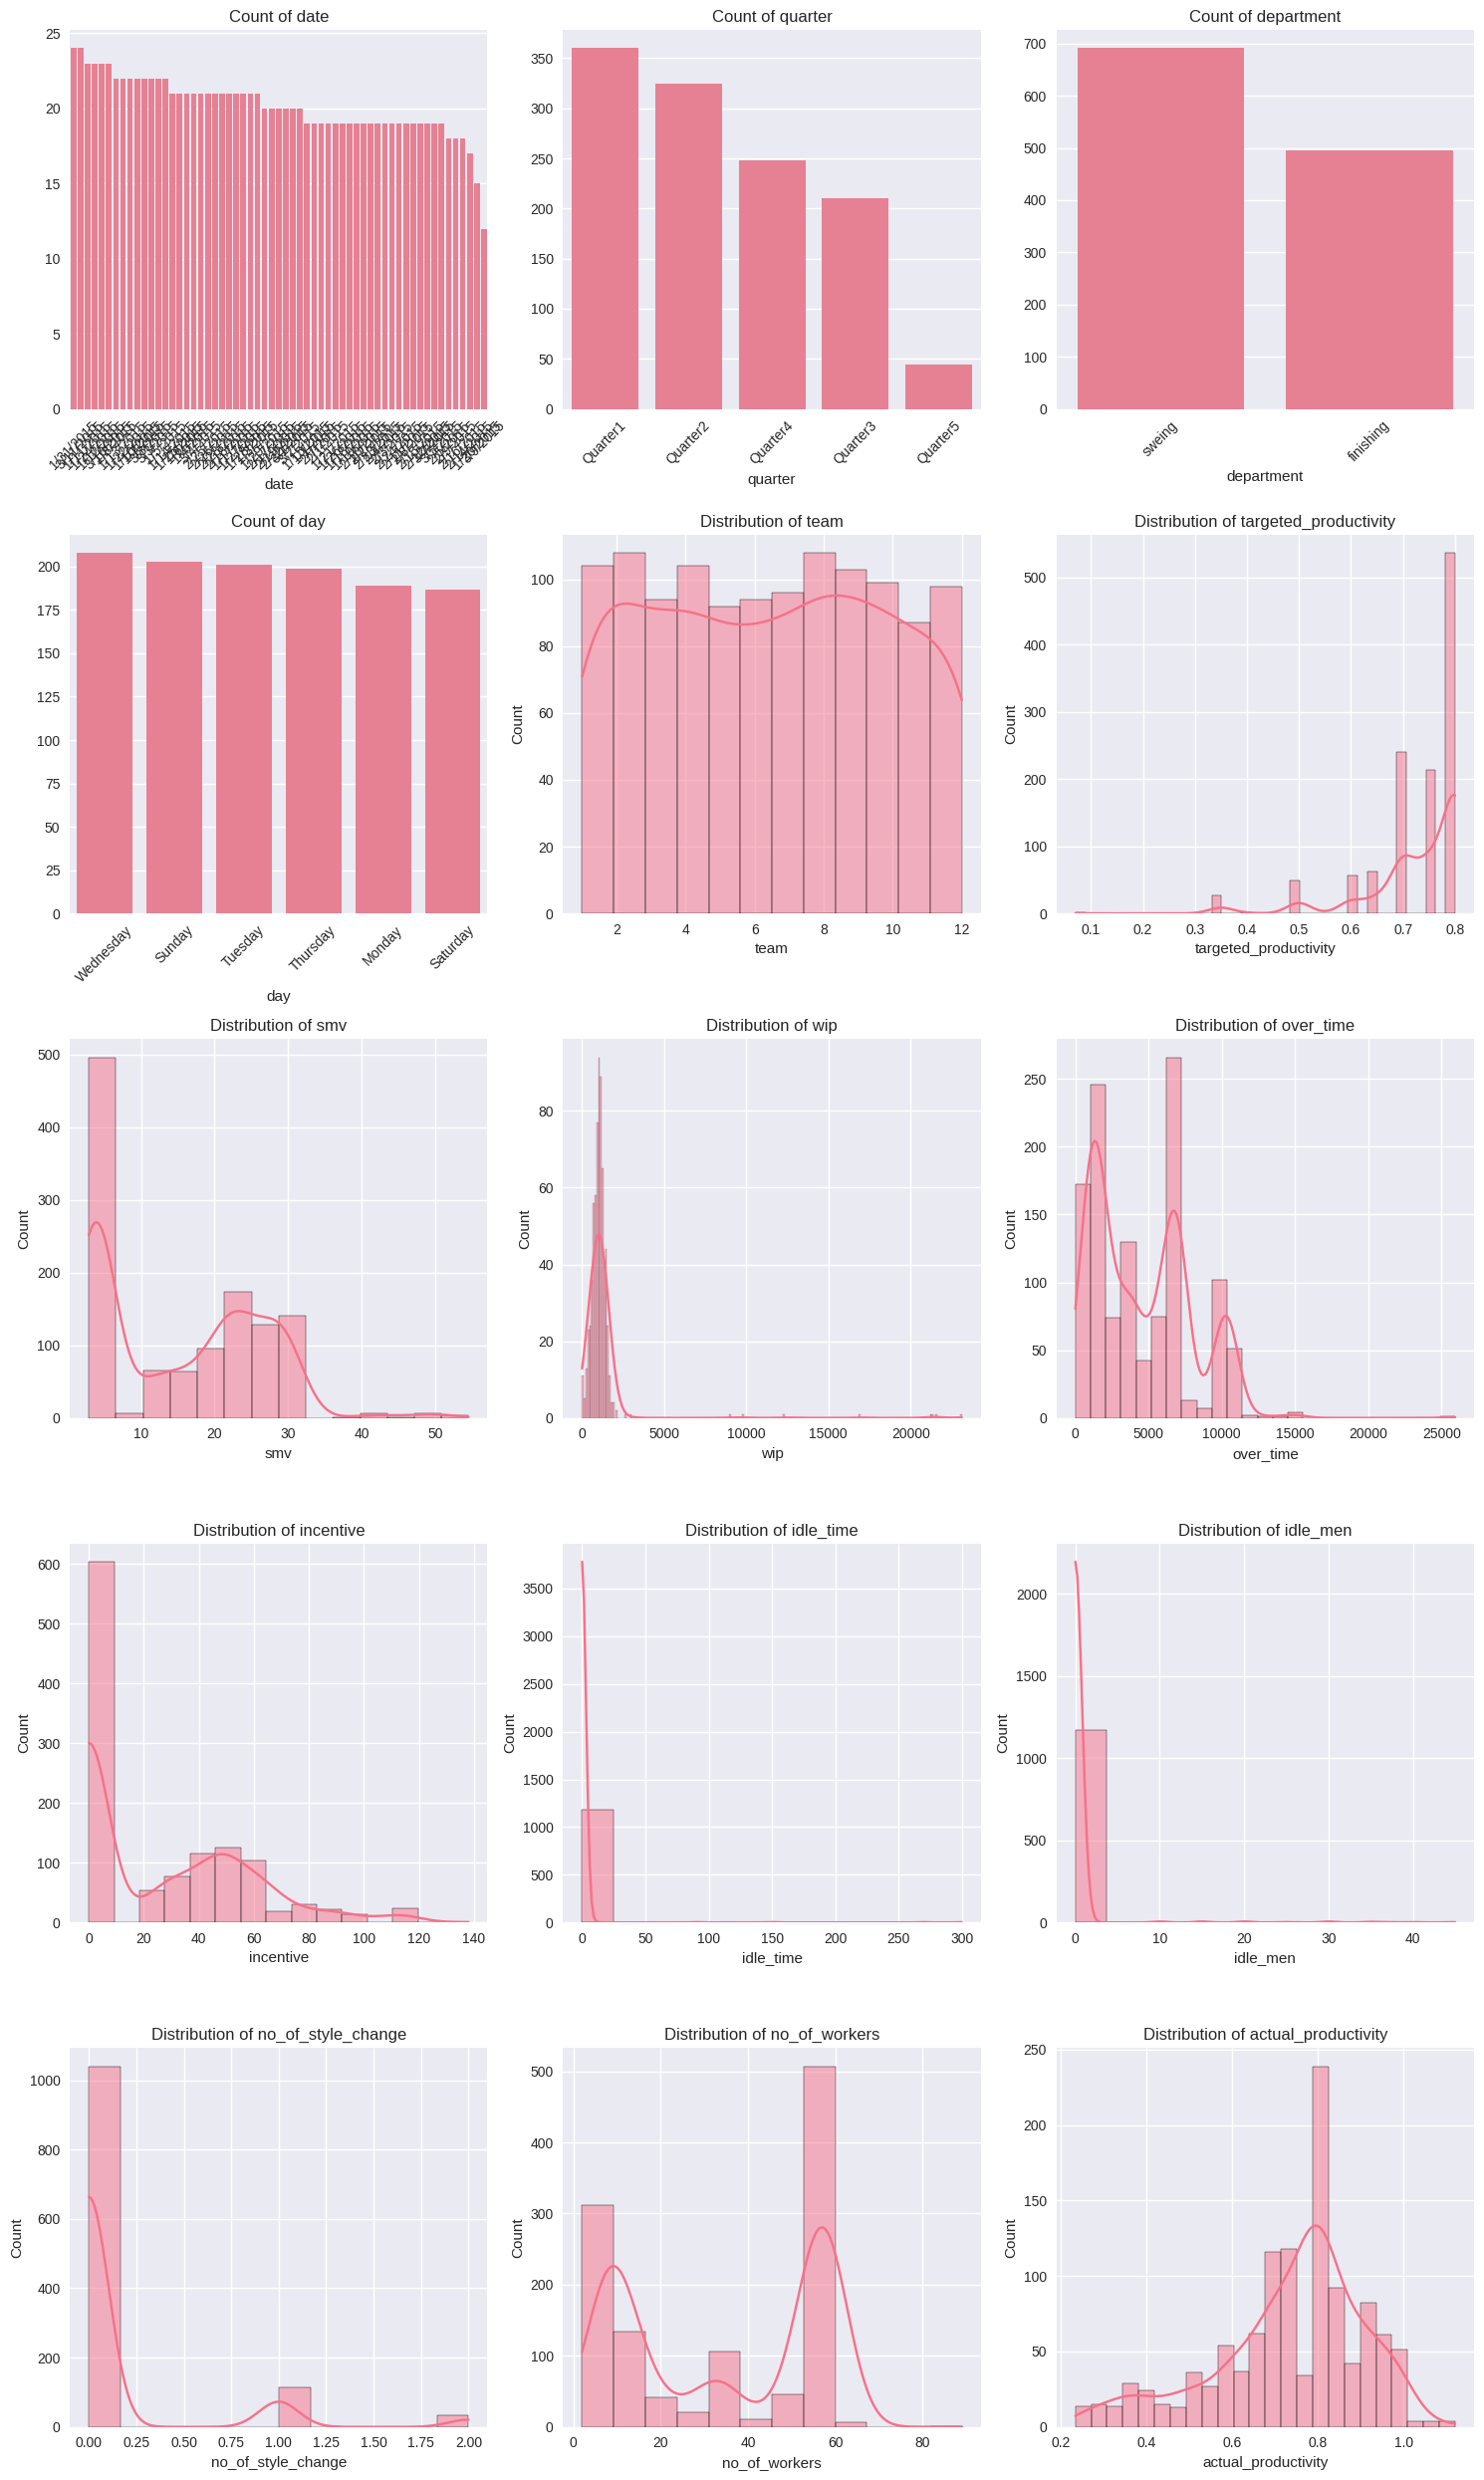

In [416]:
plot_all_columns(X)

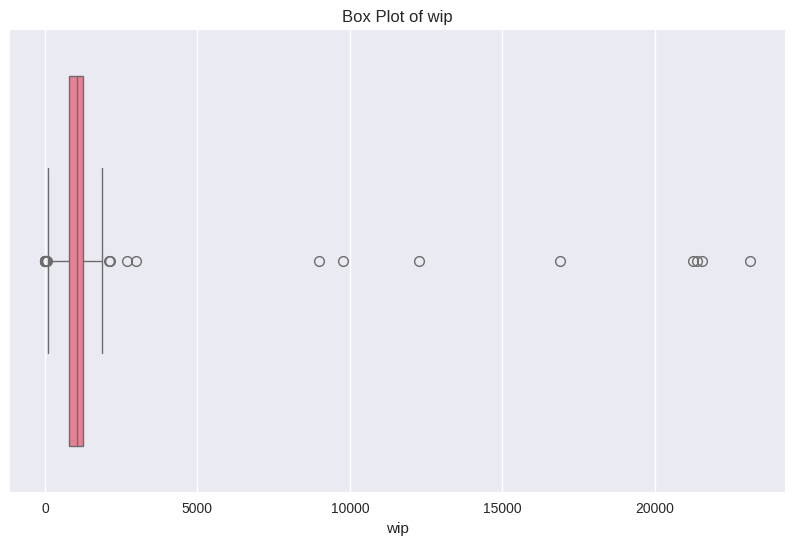

In [417]:
plot_column_details(X, 'wip')

In [418]:
# 2. Valores faltantes en 'wip'
print("Valores faltantes en 'wip':", X['wip'].isnull().sum())

Valores faltantes en 'wip': 496


In [419]:
# 3. Cardinalidad de variables categóricas
print("\nCategorías únicas:")
print("Departamento:", X['department'].unique())
print("Día de la semana:", X['day'].unique())
print("Trimestre:", X['quarter'].unique())
print("Equipos:", X['team'].nunique())


Categorías únicas:
Departamento: ['sweing' 'finishing']
Día de la semana: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
Trimestre: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
Equipos: 12


In [420]:
# 4. Rango de fechas
print("\nRango de fechas:")
print("Mínima:", X['date'].min())
print("Máxima:", X['date'].max())


Rango de fechas:
Mínima: 1/1/2015
Máxima: 3/9/2015


In [421]:
# Nota:
# La variable wip lleva valores NaN y numéricos.
# Se crea dos funciones para imputar los valores faltantes.
# La primera función imputa el wip con ceros
# La segunda función imputa el wio con la media

def show_NaN_values(X):
  print(np.isnan(X).sum())

def fill_wip_with_zero(X: pd.DataFrame) -> pd.DataFrame:
    """Rellena NaN en la columna 'wip' con 0."""
    X = X.copy()
    X['wip'] = X['wip'].fillna(0)
    return X

def fill_wip_with_mean(X: pd.DataFrame) -> pd.DataFrame:
    """Rellena NaN en la columna 'wip' con la media de esa columna."""
    X = X.copy()
    mean_value = X['wip'].mean()
    X['wip'] = X['wip'].fillna(mean_value)
    return X

def count_wip_outliers(X: pd.DataFrame, threshold: float = 5000) -> None:
    """
    Cuenta y muestra cuántas filas tienen 'wip' mayor o igual al umbral.

    Parámetros:
        X: pd.DataFrame - Dataset
        threshold: float - Valor umbral para considerar outliers
    """
    count = (X['wip'] >= threshold).sum()
    print(f"Cantidad de outliers en 'wip' >= {threshold}: {count}")

def remove_wip_outliers(X: pd.DataFrame, threshold: float = 5000) -> pd.DataFrame:
    """
    Elimina filas donde 'wip' es mayor o igual al umbral (default 5000).

    Parámetros:
        X: pd.DataFrame - Dataset original
        threshold: float - Valor umbral para considerar outliers

    Retorna:
        pd.DataFrame - Dataset filtrado sin outliers en 'wip'
    """
    X_filtered = X[X['wip'] < threshold].copy()
    return X_filtered

def remove_wip_greather_than_0(X: pd.DataFrame, threshold: float = 0) -> pd.DataFrame:
    X_filtered = X[X['wip'] == threshold].copy()
    return X_filtered

count_wip_outliers(X)
X = fill_wip_with_zero(X)
X = remove_wip_outliers(X)

#show_NaN_values(X)

Cantidad de outliers en 'wip' >= 5000: 8


In [422]:
# Se crean nuevos campos a partir del atributo "date"
X['day_of_year'] = pd.to_datetime(X['date']).dt.dayofyear
X['day_of_month'] = pd.to_datetime(X['date']).dt.day
X['month'] = pd.to_datetime(X['date']).dt.month
X.drop(columns=['date'], inplace=True)


In [423]:
# De acuerdo al análisis de los datos, se observa que los datos trimestrales son valores del 1 al 5
# Nota: cuatro trimestres forma un año.
X.drop(columns=['quarter'], inplace=True)
X.drop_duplicates(inplace=True)

In [424]:
# Definir columnas numéricas y categóricas
numeric_features = ['smv', 'over_time', 'incentive', 'idle_time', 'no_of_workers', 'day_of_year', 'day_of_month', 'month', 'wip', 'targeted_productivity']
categorical_features = ['department', 'day', 'team']

# Se escala variables numéricas
scaler = StandardScaler()

# Se codifica variables categóricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = encoder.fit_transform(X[categorical_features])
X.drop(columns=categorical_features, inplace=True)
X = pd.merge(X, pd.DataFrame(X_cat, columns=encoder.get_feature_names_out(categorical_features)), left_index=True, right_index=True)

# Combinar variables numéricas y categóricas
X[numeric_features] = scaler.fit_transform(X[numeric_features])




                            smv  over_time  incentive  idle_time  \
smv                    1.000000   0.667605   0.597671   0.057496   
over_time              0.667605   1.000000   0.531462   0.030882   
incentive              0.597671   0.531462   1.000000  -0.040167   
idle_time              0.057496   0.030882  -0.040167   1.000000   
no_of_workers          0.911310   0.728408   0.692686   0.058866   
day_of_year            0.013687  -0.243969  -0.085036   0.010387   
day_of_month           0.002983   0.028358   0.000466  -0.047094   
month                  0.010136  -0.233856  -0.078597   0.026364   
wip                    0.727173   0.621621   0.718828  -0.003058   
targeted_productivity -0.072943  -0.092425   0.213255  -0.056230   

                       no_of_workers  day_of_year  day_of_month     month  \
smv                         0.911310     0.013687      0.002983  0.010136   
over_time                   0.728408    -0.243969      0.028358 -0.233856   
incentive           

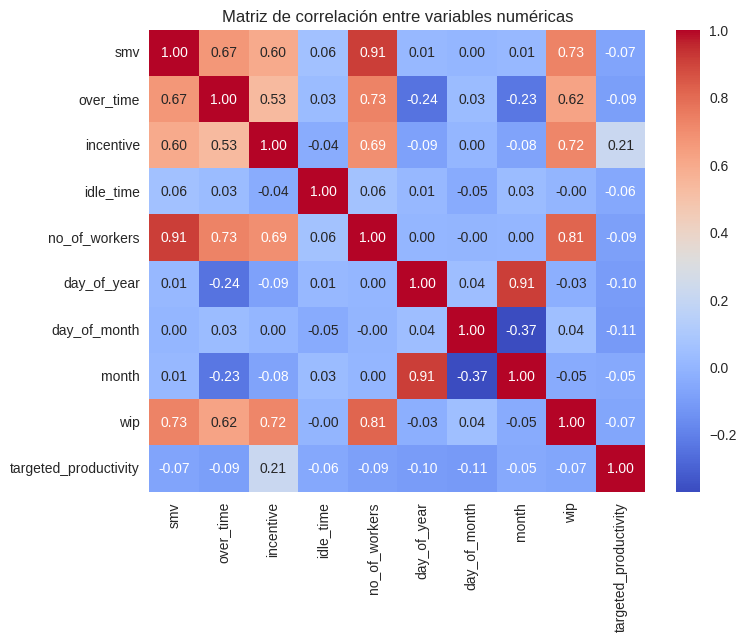

In [425]:
# Observamos la matriz de correlación

# Seleccionar solo las columnas numéricas del DataFrame
X_numeric = X[numeric_features]

# Calcular matriz de correlación
corr_matrix = X_numeric.corr()

# Mostrar matriz
print(corr_matrix)

# Opcional: visualizar con heatmap (mapa de calor)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

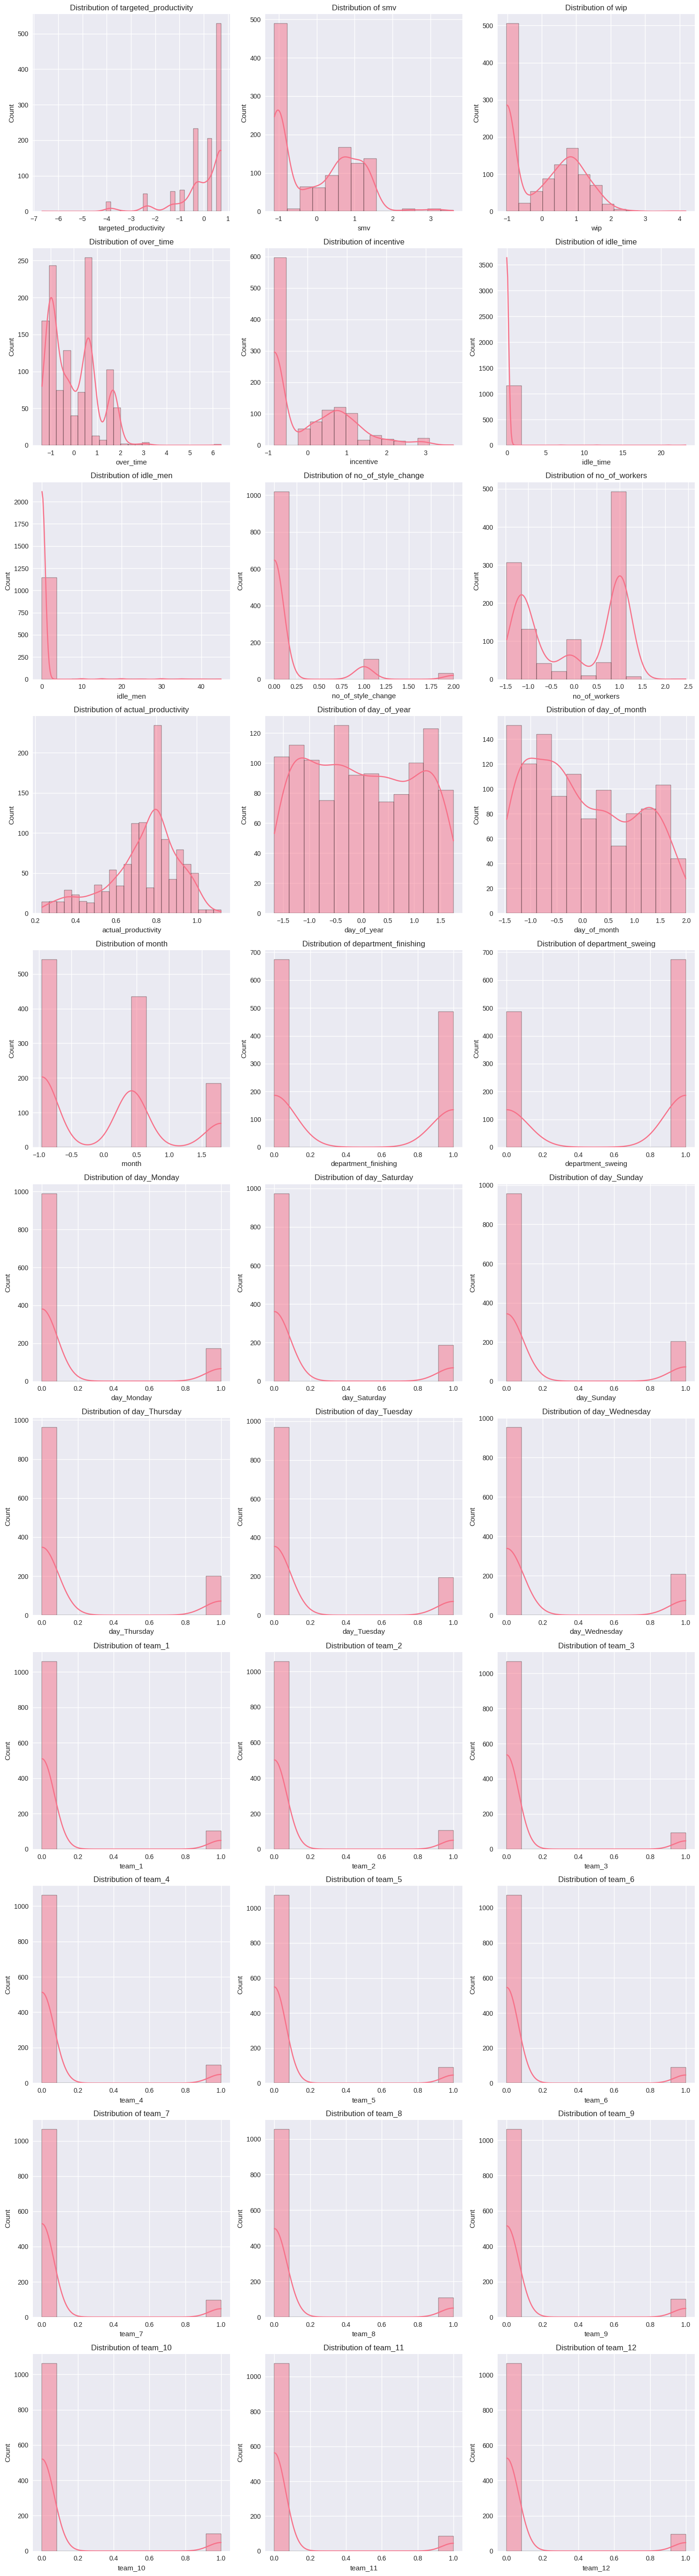

In [426]:
plot_all_columns(X)

### Solución 1: Clasificación Básica (Sin Técnicas Avanzadas)

In [427]:
# Eliminar columnas duplicadas
X.drop_duplicates(inplace=True)

### Clasificacion binaria

In [428]:
def show_count_values_target(serie):
  value_counts = serie.value_counts()

  # Plot as a bar chart
  value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
  plt.title('Value Counts of Target Column')
  plt.xlabel('Target Class')
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

In [429]:
# Discretizar la variable objetivo
# Clasificación binaria: Baja (<0.6), Alta (>=0.6)
y_bin = pd.cut(X['actual_productivity'], bins=[0, 0.6, 1.5], labels=['Baja', 'Alta'])

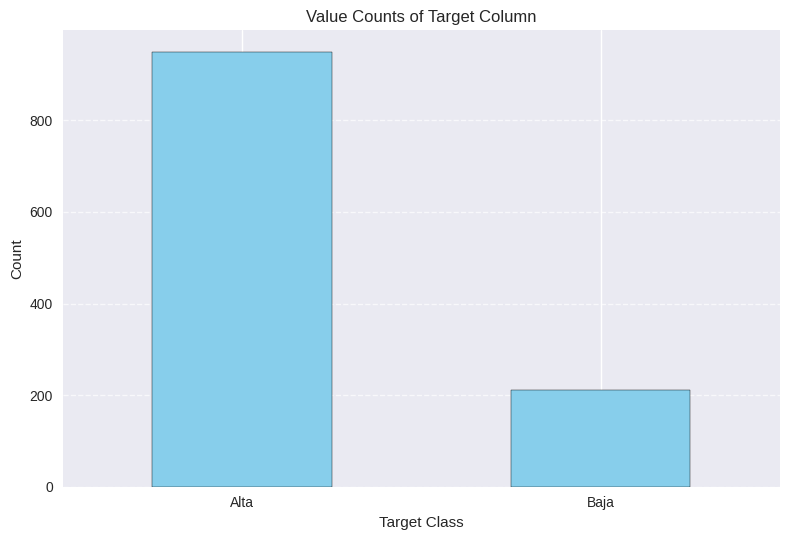

In [430]:
show_count_values_target(y_bin)

### Clasificacion ternaria

In [431]:
# Clasificación multiclase: Baja (<0.85), Media (0.85-0.95), Alta (>=0.95)
y_multi = pd.cut(X['actual_productivity'], bins=[0, 0.85, 0.95, 1.5], labels=['Baja', 'Media', 'Alta'])

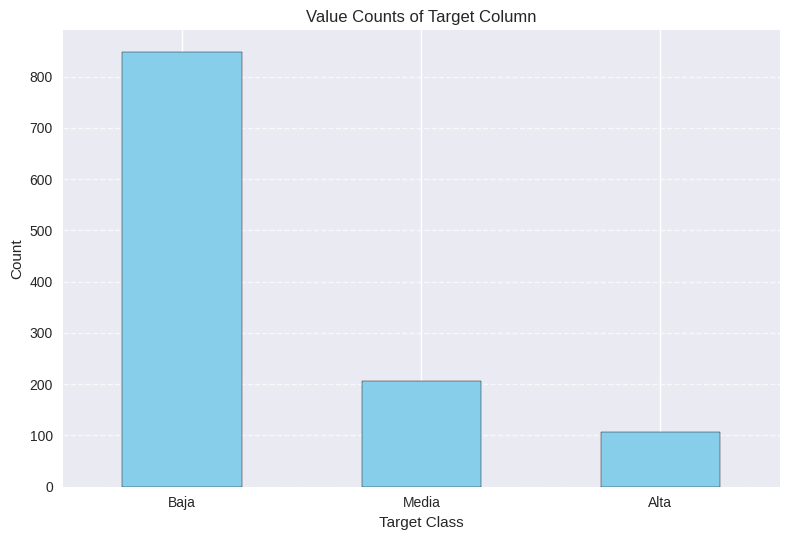

In [432]:
show_count_values_target(y_multi)

### Procesamiento Manual de Variables

In [433]:
X.drop(columns=['actual_productivity'], inplace=True)

# Entrenar Modelos (Ejemplo para Clasificación Ternaria)

### Dividir datos para clasificacion ternaria

In [434]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.3, random_state=42)

# Solucion 1: Random Forest

In [435]:
from sklearn.metrics import roc_auc_score, roc_curve

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


# Evaluar
y_pred = model.predict(X_test)
print("Precisión (Ternaria):", accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix

# Predecir en datos de prueba originales (no balanceados)
y_pred = model.predict(X_test)

# Métricas detalladas
print("Reporte de Clasificación (Datos Reales):\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

y_probs = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
print(f"AUC: {auc:.3f}")

Precisión (Ternaria): 0.839541547277937
Reporte de Clasificación (Datos Reales):
               precision    recall  f1-score   support

        Alta       0.80      0.46      0.58        35
        Baja       0.86      0.97      0.91       253
       Media       0.73      0.52      0.61        61

    accuracy                           0.84       349
   macro avg       0.80      0.65      0.70       349
weighted avg       0.83      0.84      0.83       349

Matriz de Confusión:
 [[ 16  13   6]
 [  2 245   6]
 [  2  27  32]]
AUC: 0.918


                  feature  importance
4               incentive    0.141191
1                     smv    0.100447
9             day_of_year    0.097396
10           day_of_month    0.092992
8           no_of_workers    0.090351
3               over_time    0.090064
0   targeted_productivity    0.061340
2                     wip    0.050250
11                  month    0.020391
20                 team_1    0.019584
28                 team_9    0.018323
17           day_Thursday    0.015698
16             day_Sunday    0.014333
26                 team_7    0.013700
19          day_Wednesday    0.013516
27                 team_8    0.013177
15           day_Saturday    0.012940
14             day_Monday    0.012717
30                team_11    0.012453
18            day_Tuesday    0.012405
12   department_finishing    0.012176
21                 team_2    0.011666
13      department_sweing    0.011472
23                 team_4    0.011438
22                 team_3    0.010835
29          

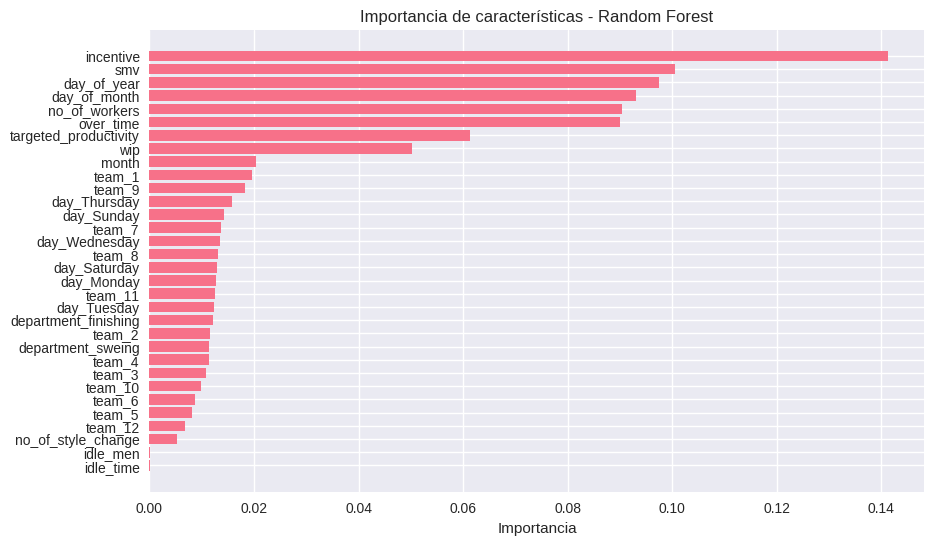

In [436]:
# Obtener importancia de características
importances = model.feature_importances_

# Crear dataframe para visualizar junto a nombres de columnas
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Ordenar de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df)

# Graficar importancia
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.gca().invert_yaxis()  # para que la más importante aparezca arriba
plt.xlabel('Importancia')
plt.title('Importancia de características - Random Forest')
plt.show()

## Detalle de arbol de decision

Accuracy: 0.7822349570200573


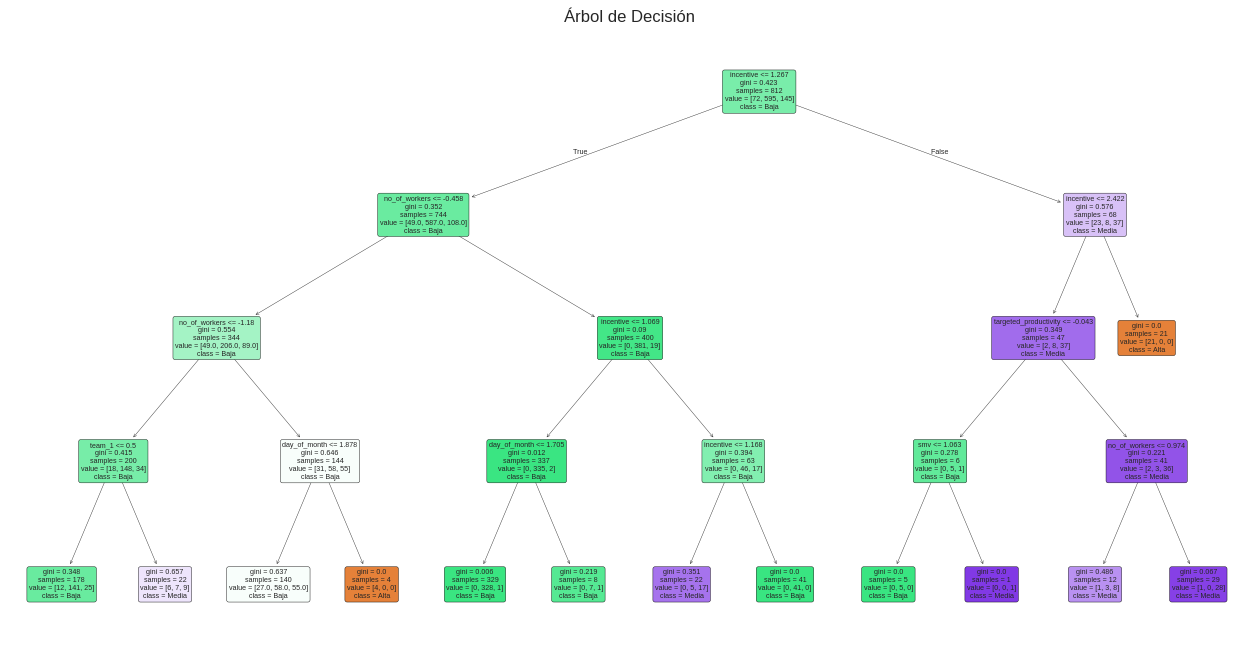

In [437]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Crear y entrenar el modelo Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Predecir y evaluar
y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=X_train.columns, class_names=[str(c) for c in tree.classes_], filled=True, rounded=True)
plt.title("Árbol de Decisión")
plt.show()


Se identifico en el arbol de decisión que el incentivo es el atributo predominante para la clasificación del modelo

## Solucion 2: KNN

In [438]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7936962750716332


## Solución 3: Máquina de Vectores de Soporte (SVM)

In [439]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for i in range(1, 11):
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        svm = SVC(kernel=kernel, C=i, random_state=42)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        print(f"Exactitud con kernel={kernel} y C={i}: {accuracy_score(y_test, y_pred)}")


Exactitud con kernel=linear y C=1: 0.7449856733524355
Exactitud con kernel=poly y C=1: 0.7392550143266475
Exactitud con kernel=rbf y C=1: 0.7736389684813754
Exactitud con kernel=sigmoid y C=1: 0.7249283667621776
Exactitud con kernel=linear y C=2: 0.7449856733524355
Exactitud con kernel=poly y C=2: 0.7621776504297995
Exactitud con kernel=rbf y C=2: 0.7851002865329513
Exactitud con kernel=sigmoid y C=2: 0.7220630372492837
Exactitud con kernel=linear y C=3: 0.7449856733524355
Exactitud con kernel=poly y C=3: 0.7851002865329513
Exactitud con kernel=rbf y C=3: 0.7851002865329513
Exactitud con kernel=sigmoid y C=3: 0.7191977077363897
Exactitud con kernel=linear y C=4: 0.7449856733524355
Exactitud con kernel=poly y C=4: 0.7879656160458453
Exactitud con kernel=rbf y C=4: 0.8022922636103151
Exactitud con kernel=sigmoid y C=4: 0.7191977077363897
Exactitud con kernel=linear y C=5: 0.7421203438395415
Exactitud con kernel=poly y C=5: 0.7965616045845272
Exactitud con kernel=rbf y C=5: 0.808022922636

Mejor resultado SVM: Exactitud con kernel=rbf y C=5: 0.7449856733524355

## Solución 4:  Regresion logistica

In [440]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predecir y evaluar
y_pred = logreg.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))

Exactitud: 0.7449856733524355


## Solución 2: Clasificación Avanzada (Con Balanceo y Optimización)

### Balanceo de Clases (SMOTE)

In [441]:
from imblearn.over_sampling import SMOTE

# Dividir datos originales (sin balancear)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_multi, test_size=0.3, random_state=42, stratify=y_multi
)

# Aplicar SMOTE solo en entrenamiento (ejemplo para clasificación multiclase)
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_train, y_train)

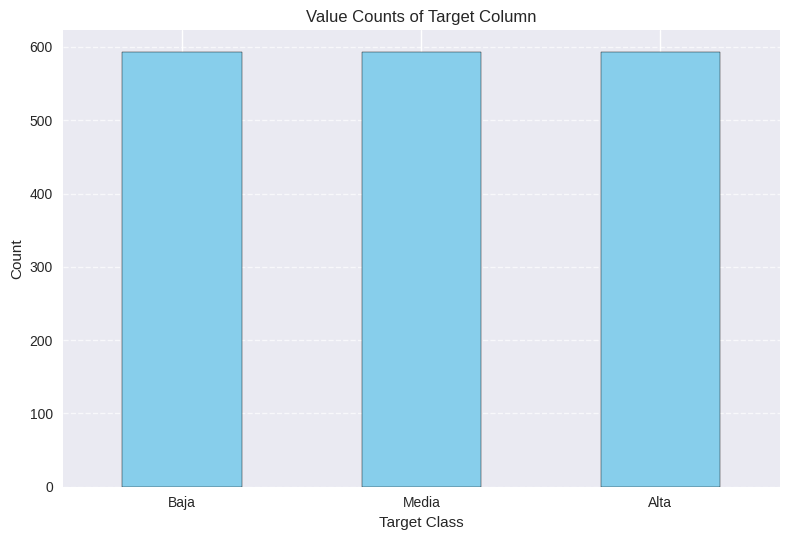

In [442]:
show_count_values_target(y_bal)

##Solución 1. Random Forest (balanceado)

In [443]:
# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_bal, y_bal)


# Evaluar
y_pred = model.predict(X_test)
print("Precisión (Ternaria):", accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix

# Predecir en datos de prueba originales (no balanceados)
y_pred = model.predict(X_test)

# Métricas detalladas
print("Reporte de Clasificación (Datos Reales):\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

Precisión (Ternaria): 0.8538681948424068
Reporte de Clasificación (Datos Reales):
               precision    recall  f1-score   support

        Alta       0.65      0.69      0.67        32
        Baja       0.89      0.96      0.92       255
       Media       0.76      0.52      0.62        62

    accuracy                           0.85       349
   macro avg       0.77      0.72      0.74       349
weighted avg       0.85      0.85      0.85       349

Matriz de Confusión:
 [[ 22   8   2]
 [  3 244   8]
 [  9  21  32]]


                  feature  importance
4               incentive    0.126309
1                     smv    0.125302
9             day_of_year    0.088088
3               over_time    0.087709
8           no_of_workers    0.075043
10           day_of_month    0.066484
0   targeted_productivity    0.064315
2                     wip    0.046320
11                  month    0.022032
14             day_Monday    0.019311
17           day_Thursday    0.018960
15           day_Saturday    0.018068
28                 team_9    0.017853
20                 team_1    0.017706
26                 team_7    0.016646
19          day_Wednesday    0.016448
27                 team_8    0.016427
16             day_Sunday    0.016273
23                 team_4    0.015690
13      department_sweing    0.014008
30                team_11    0.013928
12   department_finishing    0.013837
18            day_Tuesday    0.013747
21                 team_2    0.012917
31                team_12    0.011813
29          

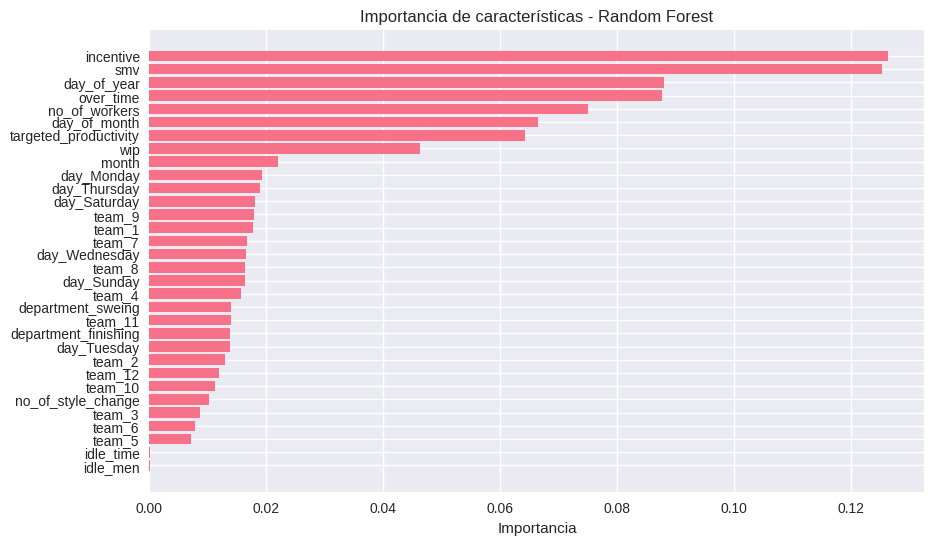

In [444]:
# Obtener importancia de características
importances = model.feature_importances_

# Crear dataframe para visualizar junto a nombres de columnas
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Ordenar de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df)

# Graficar importancia
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.gca().invert_yaxis()  # para que la más importante aparezca arriba
plt.xlabel('Importancia')
plt.title('Importancia de características - Random Forest')
plt.show()

## Detalle de arbol de decision (con Balanceo)

Accuracy: 0.8252148997134671


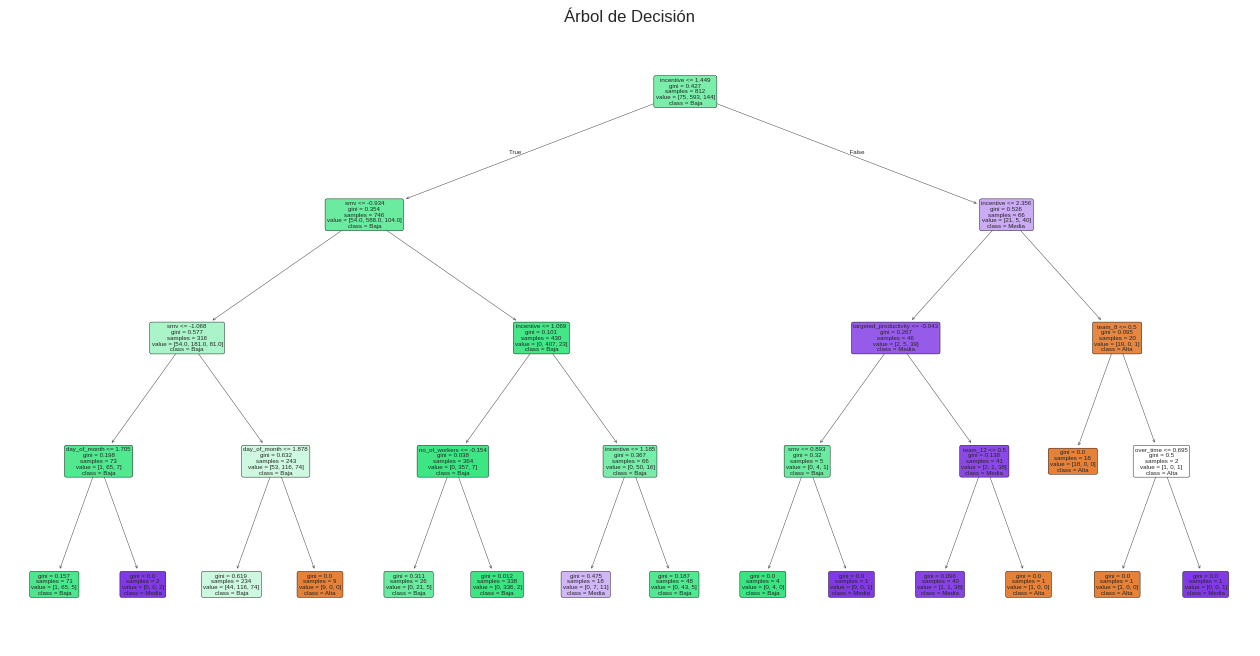

In [445]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Crear y entrenar el modelo Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Predecir y evaluar
y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=X_train.columns, class_names=[str(c) for c in tree.classes_], filled=True, rounded=True)
plt.title("Árbol de Decisión")
plt.show()

## Solución 2: KNN (con Balanceo)

In [446]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_bal, y_bal)

# Predecir y evaluar
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6017191977077364


## Solución 3: Máquina de Vectores de Soporte (SVM) (con Balanceo)

In [447]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for i in range(1, 11):
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        svm = SVC(kernel=kernel, C=i, random_state=42)
        svm.fit(X_bal, y_bal)
        y_pred = svm.predict(X_test)
        print(f"Exactitud con kernel={kernel} y C={i}: {accuracy_score(y_test, y_pred)}")

Exactitud con kernel=linear y C=1: 0.5444126074498568
Exactitud con kernel=poly y C=1: 0.6532951289398281
Exactitud con kernel=rbf y C=1: 0.673352435530086
Exactitud con kernel=sigmoid y C=1: 0.37249283667621774
Exactitud con kernel=linear y C=2: 0.5530085959885387
Exactitud con kernel=poly y C=2: 0.7163323782234957
Exactitud con kernel=rbf y C=2: 0.7277936962750716
Exactitud con kernel=sigmoid y C=2: 0.3151862464183381
Exactitud con kernel=linear y C=3: 0.5587392550143266
Exactitud con kernel=poly y C=3: 0.7335243553008596
Exactitud con kernel=rbf y C=3: 0.7363896848137536
Exactitud con kernel=sigmoid y C=3: 0.30659025787965616
Exactitud con kernel=linear y C=4: 0.5558739255014327
Exactitud con kernel=poly y C=4: 0.7335243553008596
Exactitud con kernel=rbf y C=4: 0.7449856733524355
Exactitud con kernel=sigmoid y C=4: 0.30659025787965616
Exactitud con kernel=linear y C=5: 0.5530085959885387
Exactitud con kernel=poly y C=5: 0.7421203438395415
Exactitud con kernel=rbf y C=5: 0.7650429799

## Solución 4: Regresion logistica (con Balanceo)

In [448]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_bal, y_bal)

# Predecir y evaluar
y_pred = logreg.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))

Exactitud: 0.5730659025787965


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Optimizar Hiperparámetros (GridSearchCV)

In [449]:
"""
from sklearn.model_selection import GridSearchCV

# Definir parámetros para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Búsqueda en grid
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5
)
grid_search.fit(X_bal, y_bal)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir espacio de búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',  # Métrica para multiclase
    cv=5,
    n_jobs=-1
)

# Ejecutar búsqueda en datos balanceados
grid_search.fit(X_bal, y_bal)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


### Evaluación en Conjunto de Prueba No Balanceado

In [450]:
from sklearn.metrics import classification_report, confusion_matrix

# Predecir en datos de prueba originales (no balanceados)
y_pred = best_model.predict(X_test)

# Métricas detalladas
print("Reporte de Clasificación (Datos Reales):\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

Reporte de Clasificación (Datos Reales):
               precision    recall  f1-score   support

        Alta       0.63      0.69      0.66        32
        Baja       0.90      0.95      0.93       255
       Media       0.70      0.52      0.59        62

    accuracy                           0.85       349
   macro avg       0.74      0.72      0.72       349
weighted avg       0.84      0.85      0.84       349

Matriz de Confusión:
 [[ 22   6   4]
 [  3 242  10]
 [ 10  20  32]]


### Validación Cruzada y Evaluación

In [451]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
scores = cross_val_score(best_model, X_bal, y_bal, cv=5, scoring='f1_weighted')
print("F1-score promedio:", np.mean(scores))


# Evaluar en datos de prueba
#X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)
#y_pred = best_model.predict(X_test)
#print("Precisión (Multiclase):", accuracy_score(y_test, y_pred))

F1-score promedio: 0.9450227552466297
